In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import json
from datetime import datetime, timedelta
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta
import pytz
from dateutil import tz
datetime.now().replace(tzinfo=pytz.utc)
tzinfos = {"UTC": tz.gettz('UTC')} 

In [23]:
#to avoid having to deal with a bunch of timezone naive / timezone aware python BS which we don't need
def get_min_date(date1, date2):
    if (date1.year < date2.year):
        return date1
    elif (date2.year < date1.year):
        return date2
    
    if (date1.month < date2.month):
        return date1
    elif (date2.month < date1.month):
        return date2
    
    if (date1.day < date2.day):
        return date1
    elif (date2.day < date1.day):
        return date2
    #same date
    return date2

def get_max_date(date1, date2):
    if (date1.year > date2.year):
        return date1
    elif (date2.year > date1.year):
        return date2
    
    if (date1.month > date2.month):
        return date1
    elif (date2.month > date1.month):
        return date2
    
    if (date1.day > date2.day):
        return date1
    elif (date2.day > date1.day):
        return date2
    #same date
    return date2

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

def get_total_words(data):
    word_count = 0
    for key, value in data.items():
        word_count += len(value["content"])
    return word_count, len(data)

def get_num_each_day_between_dates(date1, date2):
    num_weekdays_between_min_max_date = [0, 0, 0, 0, 0, 0, 0]
    for date in daterange(date1, date2):
        num_weekdays_between_min_max_date[date.weekday()] += 1
    return num_weekdays_between_min_max_date
    

#computes total number of words per day and average number of words read per week
#average number words = total words on each weekday / number of days of that weekday
def get_words_by_day(curius_data, sources_data):
    #Mon, Tues, ...., Sunday
    total_words_each_day = [0, 0, 0, 0, 0, 0, 0]
    avg_words_each_day = [0, 0, 0, 0, 0, 0, 0]
    
    min_date = datetime.now()
    max_date = datetime.now() - relativedelta(years=2)
    
    for key, value in curius_data.items():
        created_date = parse(value["createdDate"], tzinfos=tzinfos)
        if (str(key) in sources_data):
            min_date = get_min_date(created_date, min_date)
            max_date = get_max_date(created_date, max_date)
                
            total_words_each_day[created_date.weekday()] += len(sources_data[str(key)]["content"])
    
    print("min date, max date: ", min_date, max_date)
    #compute number of mondays, tuesdays, etc. between min and max date
    num_weekdays_between_min_max_date = get_num_each_day_between_dates(min_date, max_date)
    for i, toal_days in enumerate(num_weekdays_between_min_max_date):
        avg_words_each_day[i] = total_words_each_day[i] / num_weekdays_between_min_max_date[i]
    print("num weekdays each: ", num_weekdays_between_min_max_date)

    return total_words_each_day, avg_words_each_day
    

Total words:  4031548  length:  327
Saved in curius:  332
min date, max date:  2022-01-18 08:46:34.110000+00:00 2022-04-02 03:44:27.981000+00:00
num weekdays each:  [10, 11, 11, 11, 10, 10, 10]


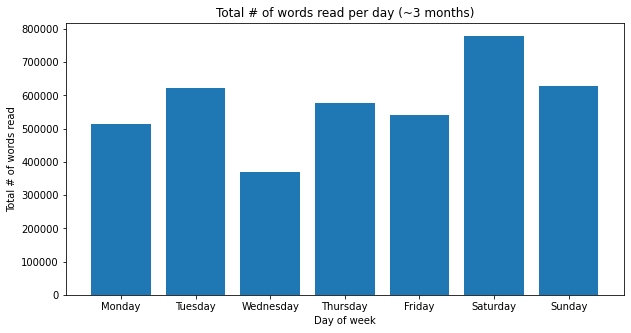

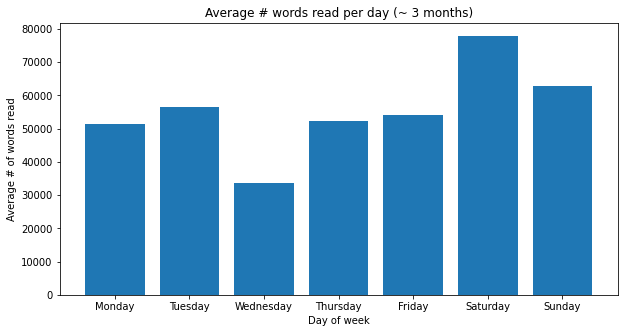

In [41]:
total_words = 0
#Sunday, Monday, ....

tags = {}
with open("../data/sources.json") as data_file:
    #yes I probably should have saved created date in the source.json but I didn't so
    #I have to grab this data from Curius
    with open("../data/curius.json") as curius_file:
        curius_map = {}
        curius_data = json.load(curius_file)
        for row in curius_data:
            curius_map[row["id"]] = row;
        
        sources_data = json.load(data_file)
        indexed_data = get_total_words(sources_data)
        #things we successfully indexed
        print("Total words: ", indexed_data[0], " length: ",indexed_data[1])
        print("Saved in curius: ", len(curius_map))
        
       
        total_words_each_day, avg_words_each_day = get_words_by_day(curius_map, sources_data)
        
        
        
        days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
        fig = plt.figure(figsize=(10, 5))
        plt.bar(days, total_words_each_day)
        plt.xlabel("Day of week")
        plt.title("Total # of words read per day (~3 months)")
        plt.ylabel("Total # of words read")
        plt.show()
        
        fig = plt.figure(figsize=(10, 5))
        plt.bar(days, avg_words_each_day)
        plt.xlabel("Day of week")
        plt.title("Average # words read per day (~ 3 months)")
        plt.ylabel("Average # of words read")
        plt.show()
        
        